In [6]:
# ---------------- Step 0: Imports ----------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


In [7]:
# ---------------- Step 1: Load Cleaned Data ----------------
benin = pd.read_csv('../data/benin_clean.csv', parse_dates=['Timestamp'])
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo_clean.csv', parse_dates=['Timestamp'])

# Add country column
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets
combined = pd.concat([benin, sierra_leone, togo], ignore_index=True)


In [8]:
# ---------------- Step 2: Quick Checks ----------------
print("Combined Dataset Info:")
print(combined.info())
print("\nCombined Dataset Description:")
summary = combined[['Country','GHI','DNI','DHI']].groupby('Country').describe()
print(summary)

Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536163 entries, 0 to 1536162
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Timestamp      1536163 non-null  datetime64[ns]
 1   GHI            1536163 non-null  float64       
 2   DNI            1536163 non-null  float64       
 3   DHI            1536163 non-null  float64       
 4   ModA           1536163 non-null  float64       
 5   ModB           1536163 non-null  float64       
 6   Tamb           1536163 non-null  float64       
 7   RH             1536163 non-null  float64       
 8   WS             1536163 non-null  float64       
 9   WSgust         1536163 non-null  float64       
 10  WSstdev        1536163 non-null  float64       
 11  WD             1536163 non-null  float64       
 12  WDstdev        1536163 non-null  float64       
 13  BP             1536163 non-null  int64         
 14  Cleaning   

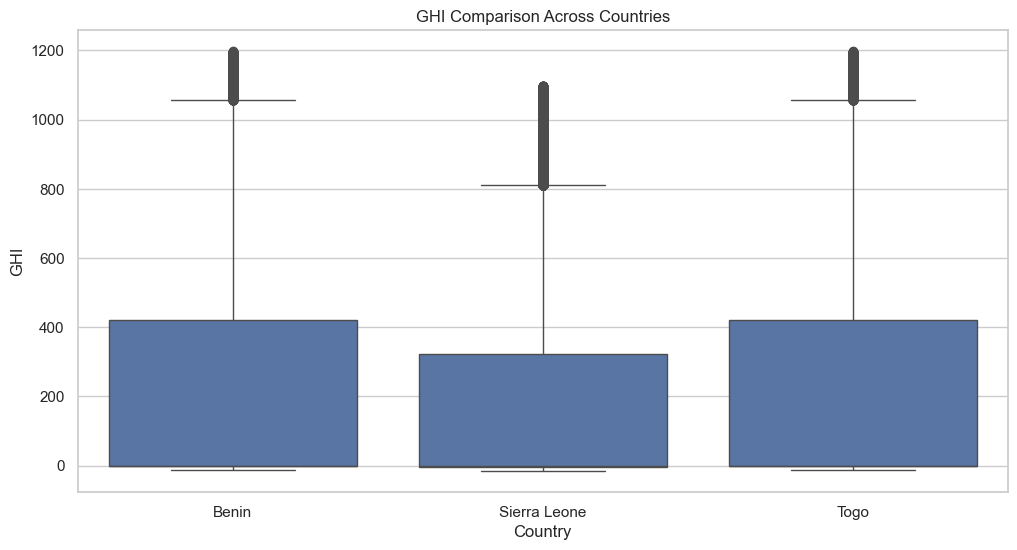

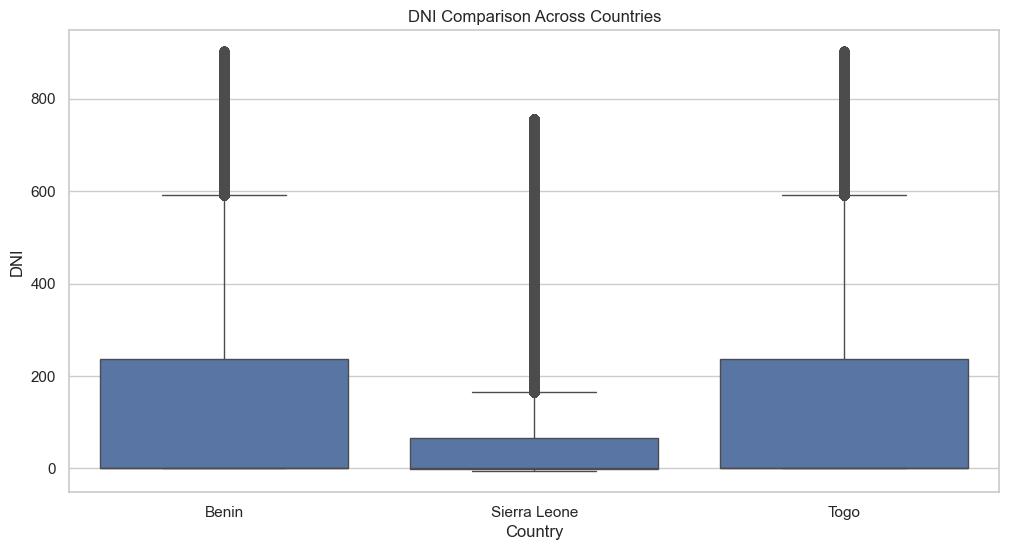

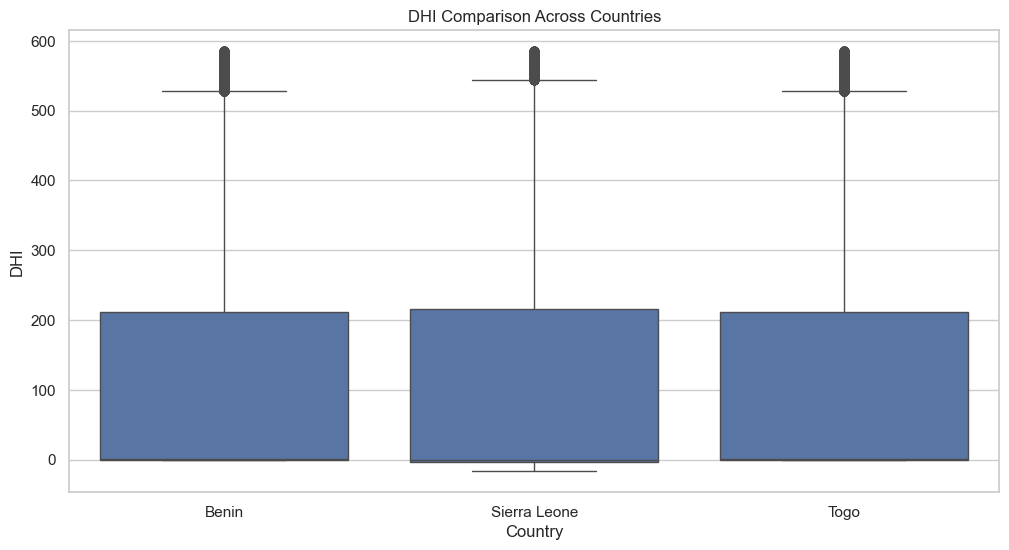

In [9]:
# ---------------- Step 3: Boxplots for GHI, DNI, DHI ----------------
for metric in ['GHI','DNI','DHI']:
    plt.figure()
    sns.boxplot(x='Country', y=metric, data=combined)
    plt.title(f'{metric} Comparison Across Countries')
    plt.show()

In [10]:
# ---------------- Step 4: Summary Table ----------------
summary = combined.groupby('Country')[['GHI','DNI','DHI']].agg(['mean','median','std'])
summary

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         223.379506    0.4  316.961929  147.579246    0.0  247.279049   
Sierra Leone  180.424277   -0.5  273.840224  100.699059   -0.1  196.340190   
Togo          223.379506    0.4  316.961929  147.579246    0.0  247.279049   

                     DHI                     
                    mean median         std  
Country                                      
Benin         112.625544    1.4  151.487829  
Sierra Leone  106.598984   -0.7  152.670299  
Togo          112.625544    1.4  151.487829

In [11]:
# ---------------- Step 5: Statistical Testing (Optional) ----------------
# One-way ANOVA for GHI
ghi_groups = [group['GHI'].values for name, group in combined.groupby('Country')]
stat, p = f_oneway(*ghi_groups)
print(f"ANOVA for GHI: F={stat:.2f}, p={p:.4f}")
if p < 0.05:
    print("Significant differences between countries (p < 0.05)")
else:
    print("No significant differences between countries (p >= 0.05)")

ANOVA for GHI: F=3395.85, p=0.0000
Significant differences between countries (p < 0.05)


# Key Observations – Solar Irradiance Comparison

## Benin & Togo
- Highest mean GHI (~223 W/m²) and DNI (~148 W/m²).  
- Large variability in GHI (std ≈ 317 W/m²), reflecting strong day/night differences.  
- Excellent candidates for **PV and CSP projects**.  

## Sierra Leone
- Lower mean GHI (~180 W/m²) and DNI (~101 W/m²).  
- More consistent GHI distribution, but DNI often low, making CSP less suitable.  
- PV technology is more appropriate here than CSP.  

## DHI (Diffuse Irradiance)
- Similar across all three countries (~106–113 W/m²), indicating comparable cloudiness and scattered light contribution.  

## Statistical Insight
- Differences between Sierra Leone and Benin/Togo are **statistically significant**, especially in GHI and DNI.  
- Benin and Togo share nearly identical solar profiles.


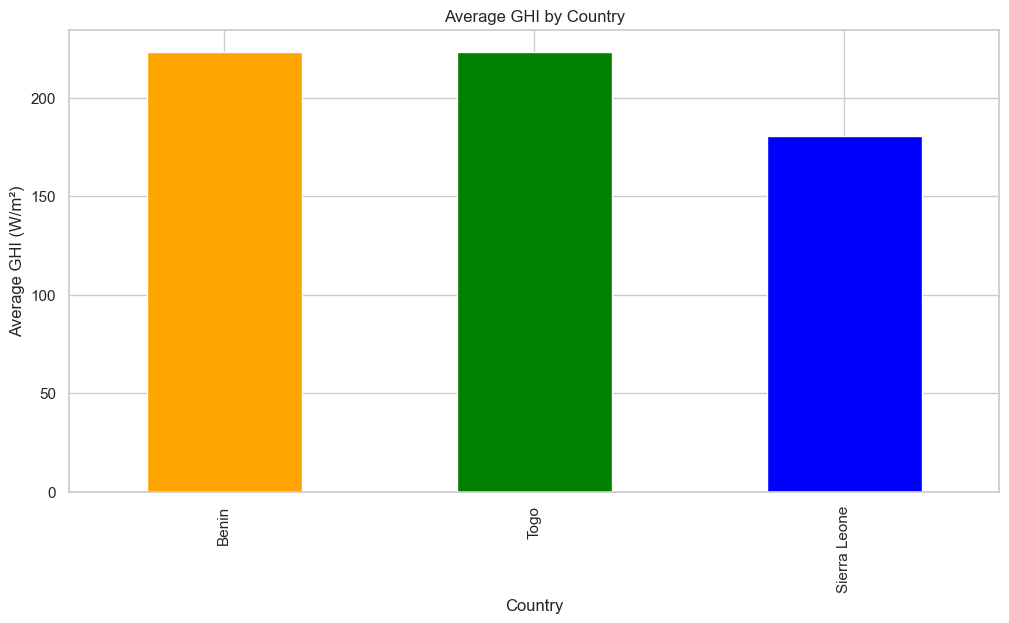

In [13]:
# ---------------- Step 7: Optional Bar Chart of Average GHI ----------------
avg_ghi = combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure()
avg_ghi.plot(kind='bar', color=['orange','green','blue'])
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.show()